In [2]:
!pip list | grep ultralytics

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd

In [2]:
xp = 'augmented_2_damages_kept_classes_no-intensity_all-roofed_complemented'
# exp_name = f"{xp}_tt_200eps_ablossg15_model3r_mit_b0_256"
v = 0
csv_path = f"lightning_logs/test_z21_p256_o127/version_{v}/metrics.csv"
# csv_path = f"lightning_logs/{exp_name}/version_{v}/metrics.csv"
df = pd.read_csv(csv_path)
df.head()

,epoch,step,test_LOSS,test_ma_IoU,test_mu_IoU,train_LOSS,train_ma_IoU,train_mu_IoU,valid_LOSS,valid_ma_IoU,valid_mu_IoU
0,0,333,NaN,NaN,NaN,NaN,NaN,NaN,2.354939,0.051453,0.098219
1,0,333,NaN,NaN,NaN,2.268699,0.033778,0.059914,NaN,NaN,NaN
2,1,667,NaN,NaN,NaN,NaN,NaN,NaN,2.168320,0.084218,0.205933
3,1,667,NaN,NaN,NaN,2.016849,0.060230,0.140059,NaN,NaN,NaN
4,2,1001,NaN,NaN,NaN,NaN,NaN,NaN,1.928914,0.106246,0.274090


In [3]:
train_cols = [col for col in df.columns if col.__contains__('train')]
valid_cols = [col for col in df.columns if col.__contains__('valid')]
train_metrics = df[train_cols].dropna(ignore_index=True)
valid_metrics = df[valid_cols].iloc[1:].dropna(ignore_index=True)

In [4]:
len(valid_metrics), len(train_metrics)

(40, 40)

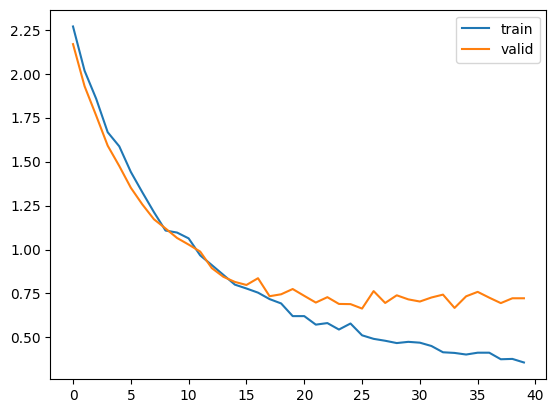

In [5]:
train_metrics['train_LOSS'].plot()
valid_metrics['valid_LOSS'].plot()
plt.legend(['train', 'valid'])

In [6]:
def plot_metric(train, valid, metric='LOSS'):
    train[f"train_{metric}"].plot()
    valid[f"valid_{metric}"].plot()
    plt.legend(['train', 'valid'])
    plt.title(f"evolution of {metric}")
    plt.show()

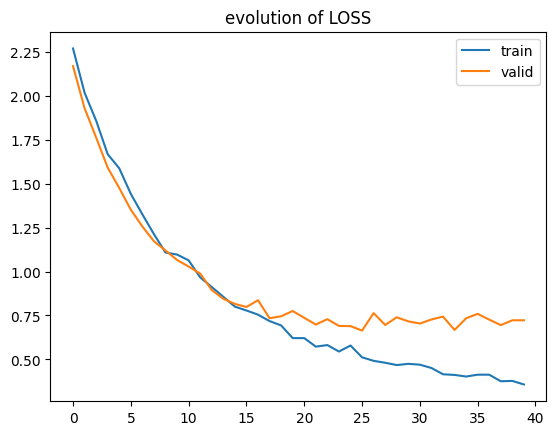

In [9]:
plot_metric(train_metrics, valid_metrics, metric='LOSS')